# Decision Trees

on the penguin dataset

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

%matplotlib inline

### Preparations

In [2]:
df = pd.read_csv('../data/all_penguins_clean.csv', index_col=0)
df.dropna(inplace=True)
df

,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Real ID,Sex
studyName,,,,,,,,,,,,,,
PAL0708,1,Adelie,Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,11/11/07,39.1,18.7,181.0,3750.0,A_0,MALE
PAL0708,2,Adelie,Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,11/11/07,39.5,17.4,186.0,3800.0,A_1,FEMALE
PAL0708,3,Adelie,Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,11/16/07,40.3,18.0,195.0,3250.0,A_2,FEMALE
PAL0708,5,Adelie,Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,11/16/07,36.7,19.3,193.0,3450.0,A_4,FEMALE
PAL0708,6,Adelie,Anvers,Torgersen,"Adult, 1 Egg Stage",N3A2,Yes,11/16/07,39.3,20.6,190.0,3650.0,A_5,MALE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PAL0910,119,Gentoo,Anvers,Biscoe,"Adult, 1 Egg Stage",N38A1,No,12/1/09,47.2,13.7,214.0,4925.0,G_338,FEMALE
PAL0910,121,Gentoo,Anvers,Biscoe,"Adult, 1 Egg Stage",N39A1,Yes,11/22/09,46.8,14.3,215.0,4850.0,G_340,FEMALE
PAL0910,122,Gentoo,Anvers,Biscoe,"Adult, 1 Egg Stage",N39A2,Yes,11/22/09,50.4,15.7,222.0,5750.0,G_341,MALE


#### 1. Inspect the size of the dataset

In [3]:
df.shape

(334, 14)

#### 2. Select the Species column to use as target

In [4]:
y = df['Species']

#### 3. Select two columns to use as input features

In [5]:
X = df[['Culmen Length (mm)', 'Body Mass (g)', 'Flipper Length (mm)']]

#### 4. Plot the data

In [6]:
d = df[['Culmen Length (mm)', 'Culmen Depth (mm)', 'Flipper Length (mm)', 'Body Mass (g)', 'Species']].copy(deep=True)
d.reset_index(inplace=True)
d.drop(columns="studyName", inplace=True)
# d

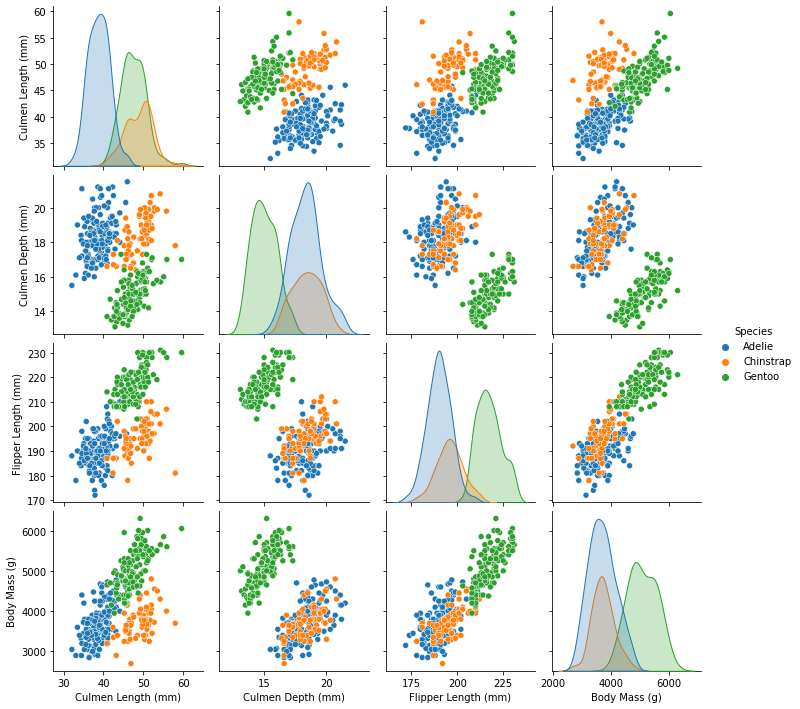

In [7]:
sns.pairplot(d, hue='Species')

<AxesSubplot:xlabel='Culmen Length (mm)', ylabel='Flipper Length (mm)'>

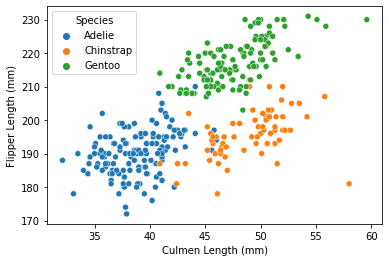

In [8]:
sns.scatterplot(x=df['Culmen Length (mm)'], y=df['Flipper Length (mm)'], hue=df['Species'])

## Decision Tree from Scratch

#### 5. Make one prediction for every penguin

In [9]:
from random import random

random()

0.813246234008613

In [26]:
predictions = []
for i, row in X.iterrows():
    # i: index, row: values of a row as a pd.Series
    if row['Culmen Length (mm)'] < 42.5:
        predictions.append('Adelie')
    elif row['Flipper Length (mm)'] > 206.5:
        predictions.append('Gentoo')
    else:
        predictions.append('Chinstrap')

#### 6. Calculate the accuracy of the model

In [27]:
from sklearn.metrics import accuracy_score

accuracy_score(y, predictions)

0.9311377245508982

## Find the optimal separation with Scikit

#### 7. Train the model

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [ ]:
m = DecisionTreeClassifier(max_depth=2)  # we allow that many questions
m.fit(...)

#### 8. Make predictions

In [ ]:
ypred = m.predict(...)

#### 9. Calculate the accuracy

In [ ]:
...

## Plot the tree

#### 10. Plot the tree with according labels

In [ ]:
plt.figure(figsize=(12, 8))
t = plot_tree(m, feature_names=[...], class_names=[...])